# Project Overview and Dataset

# Our task is to classify between Animals Cats, Dogs and Wild Animal.

### We use<b> Classification Animals dataset</b> which is available on <a href = https://www.kaggle.com> Kaggle </a> You can view and download the dataset from this  <a href = https://www.kaggle.com/datasets/andrewmvd/animal-faces> Link <a>. 

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

In [2]:
def create_dataframe(data_path):
    df = []
    
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            
            if f_path.endswith('jpg'):
                df.append([f_path, c])
                
    return pd.DataFrame(df, columns = ('filename', 'class'))

In [3]:
IMG_DIM = 244 
DATA_PATH = '/kaggle/input/animal-faces/afhq'
CLASSES = sorted(['cat', 'dog', 'wild'])

print(CLASSES) 

['cat', 'dog', 'wild']


In [4]:
# Creating dataframe to train and test.
df = create_dataframe(os.path.join(DATA_PATH, 'train'))
df_test = create_dataframe(os.path.join(DATA_PATH, 'val'))

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size = 0.30, random_state = 41)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df_train.head()

,filename,class
10835,/kaggle/input/animal-faces/afhq/train/cat/pixa...,cat
7912,/kaggle/input/animal-faces/afhq/train/wild/fli...,wild
1765,/kaggle/input/animal-faces/afhq/train/dog/pixa...,dog
13992,/kaggle/input/animal-faces/afhq/train/cat/pixa...,cat
5187,/kaggle/input/animal-faces/afhq/train/wild/pix...,wild


In [9]:
df_train

,filename,class
10835,/kaggle/input/animal-faces/afhq/train/cat/pixa...,cat
7912,/kaggle/input/animal-faces/afhq/train/wild/fli...,wild
1765,/kaggle/input/animal-faces/afhq/train/dog/pixa...,dog
13992,/kaggle/input/animal-faces/afhq/train/cat/pixa...,cat
5187,/kaggle/input/animal-faces/afhq/train/wild/pix...,wild
...,...,...
5200,/kaggle/input/animal-faces/afhq/train/wild/pix...,wild
4066,/kaggle/input/animal-faces/afhq/train/dog/pixa...,dog
12172,/kaggle/input/animal-faces/afhq/train/cat/pixa...,cat
931,/kaggle/input/animal-faces/afhq/train/dog/pixa...,dog


In [7]:
# Shape of train dataset.
df_train.shape

(10241, 2)

In [8]:
# Shape of validation data.
df_val.shape

(4389, 2)

In [9]:
# Shape of test data.
df_test.shape

(1500, 2)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_gen = ImageDataGenerator().flow_from_dataframe(
    df_train,
    target_size = (IMG_DIM, IMG_DIM),
    classes = CLASSES
)

val_gen = ImageDataGenerator().flow_from_dataframe(
    df_val,
    target_size = (IMG_DIM, IMG_DIM),
    classes = CLASSES,
    shuffle = False
)

test_gen = ImageDataGenerator().flow_from_dataframe(
    df_test,
    target_size = (IMG_DIM, IMG_DIM),
    classes = CLASSES,
    shuffle = False
)

Found 10241 validated image filenames belonging to 3 classes.
Found 4389 validated image filenames belonging to 3 classes.
Found 1500 validated image filenames belonging to 3 classes.


In [12]:
train_gen.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [13]:
# Show shape of the first batch.
train_gen[0][0].shape

(32, 244, 244, 3)

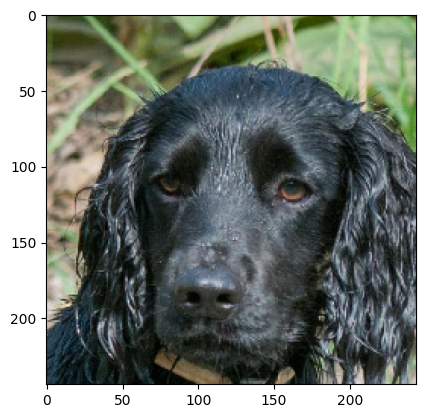

In [14]:
# Take image from batch.
img = train_gen[0][0][1]

# Show the image.
plt.imshow(img/255.0)  # Should divide to 255 to appear image in range [0:1] not range[0:255].
plt.show()

# Build CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build Structure of model.
model = Sequential()

# First Block.
model.add(Conv2D(16, 7, activation = 'relu', input_shape = (IMG_DIM, IMG_DIM, 3)))
model.add(Conv2D(16, 7, activation = 'relu'))
model.add(Conv2D(16, 7, activation = 'relu'))
model.add(MaxPooling2D(2))

# Second Block.
model.add(Conv2D(32, 5, activation = 'relu'))
model.add(Conv2D(32, 5, activation = 'relu'))
model.add(Conv2D(32, 5, activation = 'relu'))
model.add(MaxPooling2D(2))

# 3th Block.
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Conv2D(64, 3, activation = 'relu', name = 'last_conv'))
model.add(MaxPooling2D(2))

# Put all image in one vector.
model.add(Flatten())

# The output layer.
model.add(Dense(3, activation = 'softmax'))

# Specific all the parameter of compile.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Make summary of model.
model.summary()

# Path that will save model in it.
MODEL_PATH = 'saved-models/cnn'

# Train CNN Model

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    MODEL_PATH,
    save_weights_only = True,
    save_best_only = True,
    verbose = 1
)

history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 8,
    callbacks = [checkpoint],
)

Epoch 1/8
321/321 [==============================] - ETA: 0s - loss: 0.6533 - accuracy: 0.7214
Epoch 1: val_loss improved from inf to 0.31817, saving model to saved-models/cnn
321/321 [==============================] - 69s 182ms/step - loss: 0.6533 - accuracy: 0.7214 - val_loss: 0.3182 - val_accuracy: 0.8845
Epoch 2/8
320/321 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8807
Epoch 2: val_loss did not improve from 0.31817
321/321 [==============================] - 57s 178ms/step - loss: 0.3107 - accuracy: 0.8807 - val_loss: 0.7444 - val_accuracy: 0.6851
Epoch 3/8
321/321 [==============================] - ETA: 0s - loss: 0.3228 - accuracy: 0.8744
Epoch 3: val_loss improved from 0.31817 to 0.29524, saving model to saved-models/cnn
321/321 [==============================] - 60s 186ms/step - loss: 0.3228 - accuracy: 0.8744 - val_loss: 0.2952 - val_accuracy: 0.8843
Epoch 4/8
321/321 [==============================] - ETA: 0s - loss: 0.2093 - accuracy: 0.9192
Epoch

# Test CNN Model.

In [38]:
# Load weights.
model.load_weights(MODEL_PATH)

# Test Model.
model.evaluate(test_gen)

47/47 [==============================] - 9s 194ms/step - loss: 0.2103 - accuracy: 0.9180


[0.21025070548057556, 0.9179999828338623]

# Function To Make Saliency Map

In [22]:
import tensorflow as tf

def saliency_map(img):
    
    plt.imshow(img/255.0)
    plt.show()

    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    grads_2d = grads.numpy()[0].max(axis=2)
    grads_2d_norm = (grads_2d - grads_2d.min())/(grads_2d.max() - grads_2d.min())

    grads_2d_uint8 = (grads_2d_norm*255.0).astype('uint8')
    _, grads_2d_bin = cv2.threshold(grads_2d_uint8, 0, 255, cv2.THRESH_OTSU)
    plt.imshow(grads_2d_bin, cmap='gray')
    plt.show()
    
    print(CLASSES[np.argmax(result)])

# Test ssaliency_map Using CNN Model

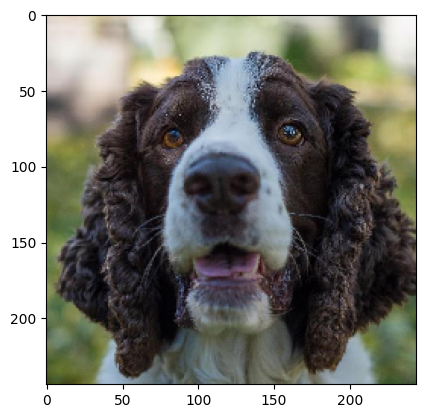

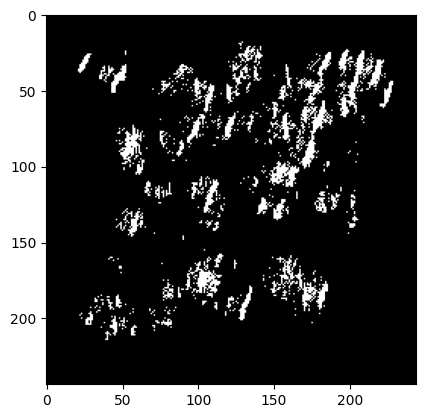

dog


In [39]:
img = test_gen[0][0][0]

saliency_map(img)

# Function to make Heatmap on the image

In [24]:
def grad_cam_heatmap(image, last_conv_layer_name='last_conv'):
    
    if model.layers[0].__class__.__name__ == 'Functional':
        last_conv_layer_idx = 0
        last_conv_layer_model = model.layers[0]
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_idx = model.layers.index(last_conv_layer)
        last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)


    classifier_input = tf.keras.Input(shape=last_conv_layer_model.output.shape[1:])
    x = classifier_input
    classifier_layers = model.layers[last_conv_layer_idx+1:]
    for layer in classifier_layers:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)


    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(image)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]
        print(CLASSES[top_pred_index])

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)


    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [26]:
import matplotlib.cm as cm

def grad_cam(img, last_conv_layer_name = 'last_conv'):
    colors = cm.jet(np.arange(256))[:, :3]
    gc_mask = grad_cam_heatmap(np.expand_dims(img, 0), last_conv_layer_name)
    gc_mask_uint8 = (gc_mask*255.0).astype('uint8')
    heatmap = colors[gc_mask_uint8]
    heatmap = cv2.resize(heatmap, (IMG_DIM, IMG_DIM))
    heatmap = (heatmap*255).astype('uint8')
    img_uint8 = img.astype('uint8')
    img_overlay = cv2.addWeighted(src1=img_uint8, alpha=0.6, src2=heatmap, beta=0.4, gamma=0.0)
    plt.imshow(img_overlay)
    plt.show()

# Test heat map using CNN Model

wild


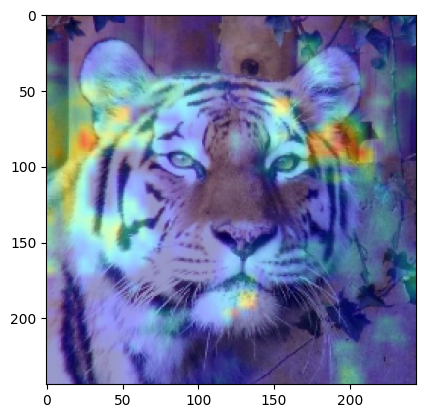

In [40]:
img = test_gen[20][0][0]

grad_cam(img)

# Train MobileNet Model.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAvgPool2D, Dense

# Call pretrained Model

In [19]:
pretrained = MobileNetV2(
    input_shape=(IMG_DIM, IMG_DIM, 3),
    include_top=False
)
pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

MODEL_PATH = 'saved-models/mobilenet'

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


# Train MobileNet Model.

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only = True,
                            save_best_only = True,
                            verbose = 1
                            )
history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 6,
    callbacks = [checkpoint],
)

Epoch 1/6
321/321 [==============================] - ETA: 0s - loss: 0.7171 - accuracy: 0.6968
Epoch 1: val_loss improved from inf to 0.57432, saving model to saved-models/mobilenet
321/321 [==============================] - 156s 454ms/step - loss: 0.7171 - accuracy: 0.6968 - val_loss: 0.5743 - val_accuracy: 0.7902
Epoch 2/6
321/321 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7971
Epoch 2: val_loss improved from 0.57432 to 0.49525, saving model to saved-models/mobilenet
321/321 [==============================] - 53s 166ms/step - loss: 0.5360 - accuracy: 0.7971 - val_loss: 0.4953 - val_accuracy: 0.8141
Epoch 3/6
321/321 [==============================] - ETA: 0s - loss: 0.4753 - accuracy: 0.8220
Epoch 3: val_loss improved from 0.49525 to 0.45904, saving model to saved-models/mobilenet
321/321 [==============================] - 53s 164ms/step - loss: 0.4753 - accuracy: 0.8220 - val_loss: 0.4590 - val_accuracy: 0.8264
Epoch 4/6
321/321 [========================

# Test MobileNet Model.

In [21]:
# Load weights.
model.load_weights(MODEL_PATH)

# Test Model.
model.evaluate(test_gen)

47/47 [==============================] - 16s 336ms/step - loss: 0.4908 - accuracy: 0.8080


[0.49082958698272705, 0.8080000281333923]

# Test saliency_map Using MobileNet  Model

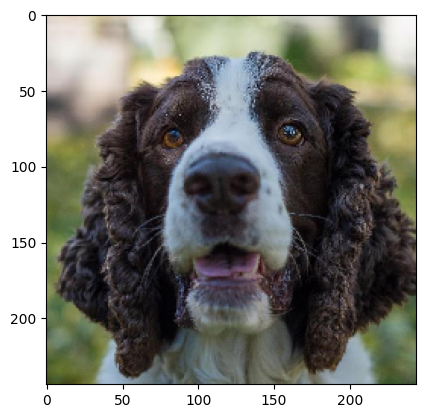

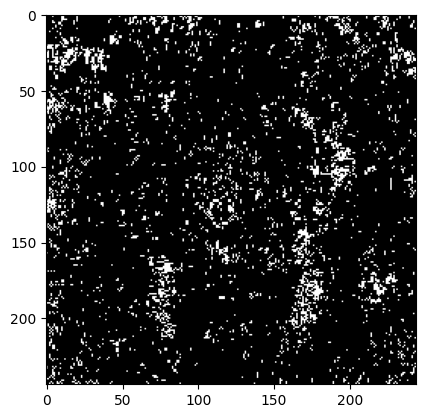

dog


In [23]:
img = test_gen[0][0][0]

saliency_map(img)

# Test heat map using MobileNet Pretrained Model

wild


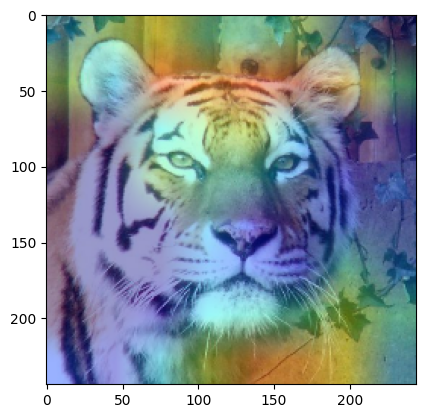

In [29]:
img = test_gen[20][0][0]
grad_cam(img)

# Train ResNet Model

In [30]:
from tensorflow.keras.applications.resnet import ResNet152

In [31]:
pretrained = ResNet152(
    input_shape = (IMG_DIM, IMG_DIM, 3),
    include_top = False
)
pretrained.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAvgPool2D())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

MODEL_PATH = 'saved-models/resnet'

234698864/234698864 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 8, 8, 2048)        58370944  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 58,377,091
Trainable params: 6,147
Non-trainable params: 58,370,944
_________________________________________________________________


# Test ResNet Model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=6,
    callbacks=[checkpoint],
)

Epoch 1/6
321/321 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9808
Epoch 1: val_loss improved from inf to 0.01936, saving model to saved-models/resnet
321/321 [==============================] - 154s 444ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0194 - val_accuracy: 0.9954
Epoch 2/6
321/321 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9954
Epoch 2: val_loss improved from 0.01936 to 0.01331, saving model to saved-models/resnet
321/321 [==============================] - 138s 430ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0133 - val_accuracy: 0.9964
Epoch 3/6
321/321 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9973
Epoch 3: val_loss improved from 0.01331 to 0.01278, saving model to saved-models/resnet
321/321 [==============================] - 138s 429ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0128 - val_accuracy: 0.9970
Epoch 4/6
321/321 [==============================]

wild


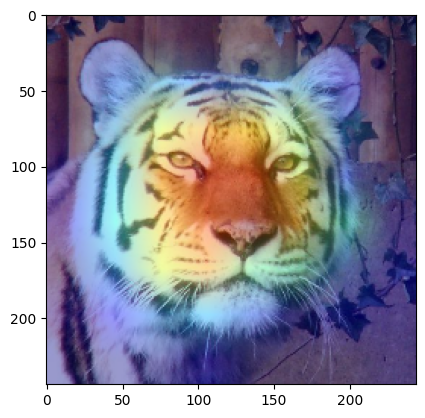

In [35]:
# Using heatmap in ResNet Model.
img = test_gen[20][0][0]

grad_cam(img)